In [126]:
import pandas as pd 

#open dataset
df0 = pd.read_csv("20220105_company_emissions_data.csv", sep=',')

#drop irrelevant columns from dataset
df1 = df0.drop(columns=['WorkforceDataPoints.AsianMinoritiesEmployeesPercent',
                       'WorkforceDataPoints.AsianMinoritiesManagersPercent', 
                      'WorkforceDataPoints.AverageEmployeeLengthOfService',
                      'WorkforceDataPoints.AverageTrainingHours', 
                      'WorkforceDataPoints.BbbeeLevel', 
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesManagersPercent',
                      'WorkforceDataPoints.ContractorAccidents',
                      'WorkforceDataPoints.ContractorFatalities',
                      'WorkforceDataPoints.ContractorLostWorkingDays',
                      'WorkforceDataPoints.DayCareServices',
                      'WorkforceDataPoints.DiversityAndOpportunityControversies',
                      'WorkforceDataPoints.EmployeeAccidents',
                      'WorkforceDataPoints.EmployeeFatalities',
                      'WorkforceDataPoints.EmployeeHealthAndSafetyTrainingHours',
                      'WorkforceDataPoints.EmployeeLostWorkingDays',
                      'WorkforceDataPoints.EmployeeResourceGroups',
                      'WorkforceDataPoints.EmployeeSatisfaction',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyControversies',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyOhsas18001',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyTeam',
                      'WorkforceDataPoints.EmployeesWithDisabilities',
                      'WorkforceDataPoints.FlexibleWorkingHours',
                      'WorkforceDataPoints.GenderPayGapPercentage',
                      'WorkforceDataPoints.HealthAndSafetyTraining',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesManagersPercent',
                      'WorkforceDataPoints.HivAidsProgram',
                      'WorkforceDataPoints.HrcCorporateEqualityIndex',
                      'WorkforceDataPoints.HsmsCertifiedPercentage',
                      'WorkforceDataPoints.InternalPromotion',
                      'WorkforceDataPoints.InvoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateContractors',
                      'WorkforceDataPoints.LostTimeInjuryRateEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateTotal',
                      'WorkforceDataPoints.LostWorkingDays',
                      'WorkforceDataPoints.ManagementDepartures',
                      'WorkforceDataPoints.ManagementTraining',
                      'WorkforceDataPoints.MinoritiesEmployeesPercent',
                      'WorkforceDataPoints.MinoritiesManagersPercent',
                      'WorkforceDataPoints.MinoritiesSalaryGapPercent',
                      'WorkforceDataPoints.NewWomenEmployees',
                      'WorkforceDataPoints.NumberOfEmployeesFromCsrReporting',
                      'WorkforceDataPoints.OccupationalDiseases',
                      'WorkforceDataPoints.OtherMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.OtherMinoritiesManagersPercent',
                      'WorkforceDataPoints.PolicyCareerDevelopment',
                      'WorkforceDataPoints.PolicyDiversityAndOpportunity',
                      'WorkforceDataPoints.PolicyEmployeeHealthAndSafety',
                      'WorkforceDataPoints.PolicySkillsTraining',
                      'WorkforceDataPoints.PolicySupplyChainHealthAndSafety',
                      'WorkforceDataPoints.RecentDiversityOpportunityControversies',
                      'WorkforceDataPoints.RecentEmployeeHealthAndSafetyControversies',
                      'WorkforceDataPoints.RecentWagesWorkingConditionControversies',
                      'WorkforceDataPoints.SalariesAndWagesFromCsrReporting',
                      'WorkforceDataPoints.Strikes',
                      'WorkforceDataPoints.SupplierESGTraining',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyImprovements',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyTraining',
                      'WorkforceDataPoints.TargetsDiversityAndOpportunity',
                      'WorkforceDataPoints.TotalInjuryRateContractors',
                      'WorkforceDataPoints.TotalInjuryRateEmployees',
                      'WorkforceDataPoints.TotalInjuryRateTotal',
                      'WorkforceDataPoints.TradeUnionRepresentation',
                      'WorkforceDataPoints.TrainingCostsTotal',
                      'WorkforceDataPoints.TrainingHoursTotal',
                      'WorkforceDataPoints.TurnoverOfEmployees',
                      'WorkforceDataPoints.VoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.WagesWorkingConditionControversiesCount',
                      'WorkforceDataPoints.WhiteMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.WhiteMinoritiesManagersPercent',
                      'WorkforceDataPoints.WomenEmployees',
                      'WorkforceDataPoints.WomenManagers',
                      'WorkforceIndicators.AnnouncedLayOffsToTotalEmployees',
                      'WorkforceIndicators.HealthAndSafetyPolicy',
                      'WorkforceIndicators.InjuriesToMillionHours',
                      'WorkforceIndicators.LostDaysToTotalDays',
                      'WorkforceIndicators.NetEmploymentCreation',
                      'WorkforceIndicators.SalaryGap',
                      'WorkforceIndicators.TrainingAndDevelopmentPolicy',
                      'WorkforceIndicators.TrainingCostsPerEmployee',
                      'WorkforceIndicators.WagesWorkingConditionControversies'],
                      axis=1)
    
#number of columns in (cleaned) dataset
len(df0.columns)
len(df1.columns)

df1.sort_values(['GTAP sector'], ascending=[True], inplace=True)

#save cleaned dataset as new file
df = df1.to_csv('company_emissions_cleaned.csv', index=True)

2019    3068
2018    2907
2017    2509
2016    2190
2015    1984
2014    1748
2012    1720
2013    1682
2011    1601
2010    1488
2009    1147
2020     688
2008     669
2007     548
2006     488
2005     331
2004     156
2003      95
2002      67
Name: StatementDetails.FinancialPeriodFiscalYear, dtype: int64

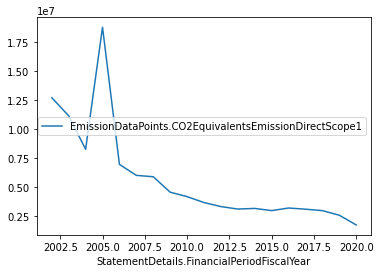

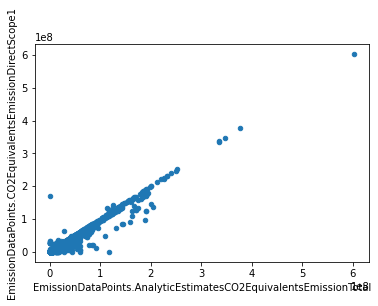

In [127]:
#drop rows with no data in either the year or target collumn
df2 = df1.dropna(subset=['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', 'StatementDetails.FinancialPeriodFiscalYear'])

#Make all data numeric
df2_numeric = df2.apply(pd.to_numeric, args=('coerce',))

#group data by year and calculate target mean for each year 
df2_grouped_by_year = df2_numeric.groupby('StatementDetails.FinancialPeriodFiscalYear').mean().apply(pd.to_numeric, args=('coerce',))

df2_grouped_by_year.reset_index().plot(x = 'StatementDetails.FinancialPeriodFiscalYear' ,y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')

df2_numeric.plot.scatter(x='EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal', y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')

df2['StatementDetails.FinancialPeriodFiscalYear'].value_counts()

In [128]:
#Keep only numeric values for correlation calculations
df_full = df2.apply(pd.to_numeric, args=('coerce',))
df_full2 = df_full.select_dtypes(['number'])

#calculate correlations
cor = df_full2.corr()
cor_target = abs(cor['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])

#display Correlation values for features with a useable correlation
features = cor_target[cor_target > 0.5]
display(features)

EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal    0.981030
EmissionDataPoints.CO2EquivalentsEmissionDirectScope1              1.000000
EmissionDataPoints.CO2EquivalentsEmissionTotal                     0.985258
EmissionDataPoints.FlaringGases                                    0.641745
EmissionDataPoints.VocEmissions                                    0.579600
Name: EmissionDataPoints.CO2EquivalentsEmissionDirectScope1, dtype: float64

In [129]:
#Remove the rows with null as given sector and print amount of sectors, and businesses per sector
df2_rename = df2.rename(columns={"GTAP sector": "sector"})
df2_sector_clean = df2_rename[df2_rename.sector != "Null"]
print(df2_sector_clean['sector'].nunique())
print(df2_sector_clean['sector'].value_counts())

#calculate mean of target per sector and print all of them
df2_grouped_by_sector = df2_sector_clean.groupby('sector').mean().apply(pd.to_numeric, args=('coerce',))
print("Mean of target by sector")
print(df2_grouped_by_sector['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])

51
Financial services nec                        2498
Computer, electronic and optical products     1568
Trade                                         1335
Electricity                                   1243
Real estate activities                        1037
Construction                                   932
Insurance                                      847
Communication                                  801
Chemical products                              787
Business services nec                          776
Other Extraction                               685
Basic pharmaceutical products                  667
Machinery and equipment nec                    564
Petroleum, coal products                       485
Bovine cattle, sheep and goats, horses         478
Gas                                            417
Transport nec                                  379
Motor vehicles and parts                       350
Fishing                                        343
Mineral products nec        

In [130]:
from sklearn import linear_model

#Hernoemt de columns omdat de '.' in de namen voor problemen zorgt
df1 = df1.rename(columns={'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1': 'scope', 'StatementDetails.FinancialPeriodFiscalYear': "year"})

#Verwijdert de NaN's
df1 = df1.dropna(subset=['scope', 'year']) 

#sorteert per jaar en neemt dan de som van elk jaar. Zodat je dan één lijn krijgt
df1 = df1.groupby('year').sum().reset_index()

#maakt array van de column
y = df1.scope.values
x = df1.year.values

#iets van stack-overvlow zodat de dimensies kloppen voor de lineaire regressie.
#Als iets niet helemaal klopt in de resultaten zou het hiermee te maken kunnen 
#hebben, want ik snap niet precies wat hier gebeurt
length = len(df1) 
x = x.reshape(length, 1)   
y = y.reshape(length, 1)

#stukkie sklearn
reg = linear_model.LinearRegression()
reg = reg.fit(x,y)

#richtingscoëfficiënt
reg.coef_


array([[2.67363876e+08]])

In [131]:
import matplotlib.pyplot as plt

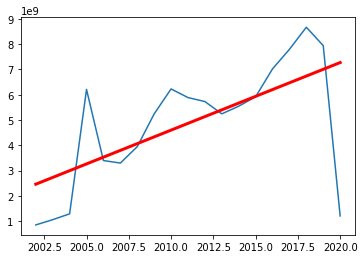

In [132]:
#plot de grafiek voor de lineaire regressie
plt.plot(x,y)
plt.plot(x, reg.predict(x), color='red', linewidth=3)
plt.show()